In [90]:
%load_ext autoreload
%autoreload 2
import terra
import numpy as np
from domino.data.gqa import split_gqa, read_gqa_dps,DATASET_DIR
from domino.slices.gqa import collect_rare_slices, TASKS, build_rare_slice
from domino.train import synthetic_score_slices
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
from domino.evaluate import run_sdm, score_sdms

df = score_sdms.out().load()

In [93]:
df.iloc[df.reset_index().groupby(["run_sdm_run_id", "slice_idx"])['auroc'].idxmax().astype(int)]

,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,target_synset,run_sdm_run_id,slice
310,10,0,0.956815,0.0,0.04,0.02,0.200000,0.200000,0.400000,dog.n.01,6717,standard_poodle.n.01
347,22,1,0.984456,0.1,0.12,0.08,0.428571,0.571429,0.571429,dog.n.01,6717,shih-tzu.n.01
360,10,2,0.927285,0.0,0.04,0.01,0.125000,0.125000,0.125000,dog.n.01,6717,silky_terrier.n.01
2,2,0,0.930154,0.1,0.08,0.02,0.285714,0.285714,0.428571,dog.n.01,6718,appenzeller.n.01
43,18,1,0.981358,0.2,0.08,0.03,0.375000,0.375000,0.625000,dog.n.01,6718,basset.n.01
68,18,2,0.895707,0.1,0.08,0.04,0.272727,0.363636,0.454545,dog.n.01,6718,kelpie.n.02
172,22,0,0.959998,0.0,0.00,0.00,0.000000,0.000000,0.000000,clothing.n.01,6719,bikini.n.02
185,10,1,0.951840,0.0,0.00,0.01,0.250000,0.250000,0.500000,clothing.n.01,6719,miniskirt.n.01
210,10,2,0.991422,0.4,0.24,0.14,0.666667,0.777778,0.777778,clothing.n.01,6719,windsor_tie.n.01
248,23,0,0.981984,0.1,0.08,0.03,0.400000,0.600000,0.600000,musical_instrument.n.01,6720,electric_guitar.n.01


In [94]:
inp = run_sdm.inp(run_id=6720, load=True)
data_dp, emb_dp = inp["data_dp"], inp["emb_dp"]
data_dp = data_dp.lz[data_dp["split"].isin(["valid", "test"])].merge(
    emb_dp[["image_id", "emb"]], on="image_id"
)

In [101]:
from domino.sdm import MixtureModelSDM, SpotlightSDM
sdm = MixtureModelSDM(
    n_slices=50, weight_y_log_likelihood=4, init_params="error"
)

In [102]:
sdm.fit(data_dp.lz[data_dp["split"] == "valid"])

 51%|█████     | 51/100 [00:08<00:08,  6.05it/s]


In [103]:
dp = sdm.transform(data_dp.lz[data_dp["split"] == "test"])

In [104]:
from domino.metrics import compute_sdm_metrics
slice_idx = 0
metrics_df = compute_sdm_metrics(dp)
metrics_df[metrics_df["slice_idx"] == slice_idx]

,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200
0,0,0,0.204203,0.0,0.0,0.00,0.0,0.0,0.0
1,1,0,0.213033,0.0,0.0,0.00,0.0,0.0,0.0
2,2,0,0.198873,0.0,0.0,0.00,0.0,0.0,0.0
3,3,0,0.946811,0.0,0.0,0.00,0.0,0.0,0.0
4,4,0,0.174419,0.0,0.0,0.00,0.0,0.0,0.0
5,5,0,0.249560,0.0,0.0,0.00,0.0,0.0,0.0
6,6,0,0.232345,0.0,0.0,0.00,0.0,0.0,0.0
7,7,0,0.848334,0.0,0.0,0.00,0.0,0.0,0.0
8,8,0,0.220202,0.0,0.0,0.00,0.0,0.0,0.0
9,9,0,0.178256,0.0,0.0,0.00,0.0,0.0,0.0


In [99]:
from domino.emb.clip import embed_words
from domino.explain import explain_slice

pred_slice_idx = 23
words_dp = embed_words.out(5143).load()
expl_dp = explain_slice(slice_dp=dp, words_dp=words_dp.lz[:int(1e4)], slice_idx=pred_slice_idx)
expl_dp.lz[(-expl_dp["score"]).argsort()[:10]]

,word (PandasSeriesColumn),score (NumpyArrayColumn),frequency (PandasSeriesColumn)
0,boards,3.583984,45741
1,guitars,3.177734,24963
2,gear,3.123047,42683
3,substrate,3.037109,15408
4,drums,2.990234,60463
5,belt,2.896484,53919
6,shield,2.875000,49209
7,silicon,2.845703,18455
8,bases,2.808594,51101
9,drum,2.808594,44456


,image_id (PandasSeriesColumn),path (PandasSeriesColumn),index (PandasSeriesColumn),image (ImageColumn),name (PandasSeriesColumn),synset_pos_offset (PandasSeriesColumn),synset (PandasSeriesColumn),target (NumpyArrayColumn),slices (NumpyArrayColumn),input (ImageColumn),id (PandasSeriesColumn),pred (NumpyArrayColumn),split (PandasSeriesColumn),emb (NumpyArrayColumn),pred_slices (NumpyArrayColumn)
0,n03447721_6779,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n03447721/n03447721_6779.JPEG,742052,,"gong, tam-tam",n03447721,gong.n.01,1,"np.ndarray(shape=(3,))",,n03447721_6779,7.614470e-03,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(25,))"
1,n04311174_5860,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n04311174/n04311174_5860.JPEG,1053527,,steel drum,n04311174,steel_drum.n.01,1,"np.ndarray(shape=(3,))",,n04311174_5860,4.380884e-02,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(25,))"
2,n03494278_32163,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n03494278/n03494278_32163.JPEG,761622,,"harmonica, mouth organ, harp, mouth harp",n03494278,harmonica.n.01,1,"np.ndarray(shape=(3,))",,n03494278_32163,1.960582e-03,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(25,))"
3,n03249569_48167,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n03249569/n03249569_48167.JPEG,695438,,"drum, membranophone, tympan",n03249569,drum.n.01,1,"np.ndarray(shape=(3,))",,n03249569_48167,2.778219e-02,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(25,))"
4,n03840681_3460,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n03840681/n03840681_3460.JPEG,878144,,"ocarina, sweet potato",n03840681,ocarina.n.01,1,"np.ndarray(shape=(3,))",,n03840681_3460,1.123470e-02,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(25,))"
5,n03372029_37320,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n03372029/n03372029_37320.JPEG,716762,,"flute, transverse flute",n03372029,flute.n.01,1,"np.ndarray(shape=(3,))",,n03372029_37320,3.552274e-03,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(25,))"
6,n03495258_7086,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n03495258/n03495258_7086.JPEG,763502,,harp,n03495258,harp.n.01,1,"np.ndarray(shape=(3,))",,n03495258_7086,1.321878e-02,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(25,))"
7,n03272010_1762,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n03272010/n03272010_1762.JPEG,701348,,electric guitar,n03272010,electric_guitar.n.01,1,"np.ndarray(shape=(3,))",,n03272010_1762,3.593478e-08,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(25,))"
8,ILSVRC2012_val_00047537,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00047537.JPEG,1285994,,"flute, transverse flute",n03372029,flute.n.01,1,"np.ndarray(shape=(3,))",,ILSVRC2012_val_00047537,4.256758e-04,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(25,))"
9,n03495258_8280,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n03495258/n03495258_8280.JPEG,763578,,harp,n03495258,harp.n.01,1,"np.ndarray(shape=(3,))",,n03495258_8280,3.601630e-03,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(25,))"

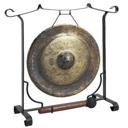
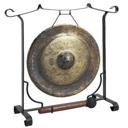
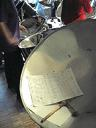
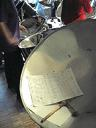
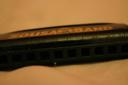
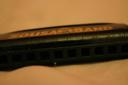
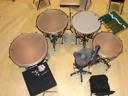
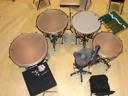
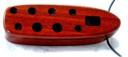
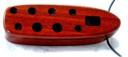
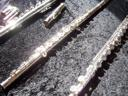
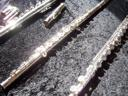
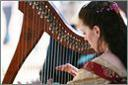
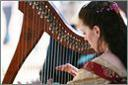
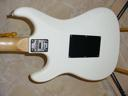
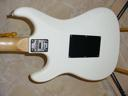
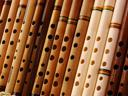
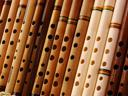
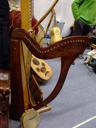
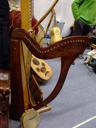

In [100]:
dp.lz[dp["pred_slices"].data[:, pred_slice_idx].argsort()[-10:]]#[["object_image", "target", "slice"]]